In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv('fraud_CreditData1.csv')
original_data = credit_card_data
credit_card_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
pd.to_datetime(credit_card_data['trans_date_trans_time'])

0        2020-06-21 12:14:00
1        2020-06-21 12:14:00
2        2020-06-21 12:14:00
3        2020-06-21 12:15:00
4        2020-06-21 12:15:00
                 ...        
555714   2020-12-31 23:59:00
555715   2020-12-31 23:59:00
555716   2020-12-31 23:59:00
555717   2020-12-31 23:59:00
555718   2020-12-31 23:59:00
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

In [5]:
credit_card_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
credit_card_data['trans_date_trans_time'] = pd.to_datetime(credit_card_data['trans_date_trans_time']).astype(int)/ 10**9

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
credit_card_data['merchant'] = le.fit_transform(credit_card_data.merchant)
credit_card_data['gender'] = le.fit_transform(credit_card_data.gender)
credit_card_data['city'] = le.fit_transform(credit_card_data.city)
credit_card_data['state'] = le.fit_transform(credit_card_data.state)
credit_card_data['job'] = le.fit_transform(credit_card_data.job)
credit_card_data['category'] = le.fit_transform(credit_card_data.category)


In [8]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  float64
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  int64  
 4   category               555719 non-null  int64  
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  int64  
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  int64  
 11  state                  555719 non-null  int64  
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [9]:
credit_card_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1.592742e+09,2.291160e+15,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,...,33.9659,-80.9355,333497,275,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,1.592742e+09,3.573030e+15,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,...,40.3207,-110.4360,302,392,1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,1.592742e+09,3.598220e+15,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,...,40.6729,-73.5365,34496,259,10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,1.592742e+09,3.591920e+15,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,407,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,1.592742e+09,3.526830e+15,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,196,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
drop_col = ['first', 'last', 'street', 'dob', 'trans_num']
credit_card_data.drop(drop_col, inplace=True, axis=1)

In [11]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  float64
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  int64  
 4   category               555719 non-null  int64  
 5   amt                    555719 non-null  float64
 6   gender                 555719 non-null  int64  
 7   city                   555719 non-null  int64  
 8   state                  555719 non-null  int64  
 9   zip                    555719 non-null  int64  
 10  lat                    555719 non-null  float64
 11  long                   555719 non-null  float64
 12  city_pop               555719 non-null  int64  
 13  job                    555719 non-null  int64  
 14  unix_time              555719 non-nu

In [12]:
credit_card_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,1.592742e+09,2.291160e+15,319,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,1,1.592742e+09,3.573030e+15,591,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,2,1.592742e+09,3.598220e+15,611,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,3,1.592742e+09,3.591920e+15,222,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,4,1.592742e+09,3.526830e+15,292,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


In [13]:
fraud_trans = credit_card_data.loc[credit_card_data['is_fraud'] == 1]
normal_trans = credit_card_data.loc[credit_card_data['is_fraud'] == 0]

In [14]:
len(fraud_trans)

2145

In [15]:
len(normal_trans)

553574

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<AxesSubplot:>

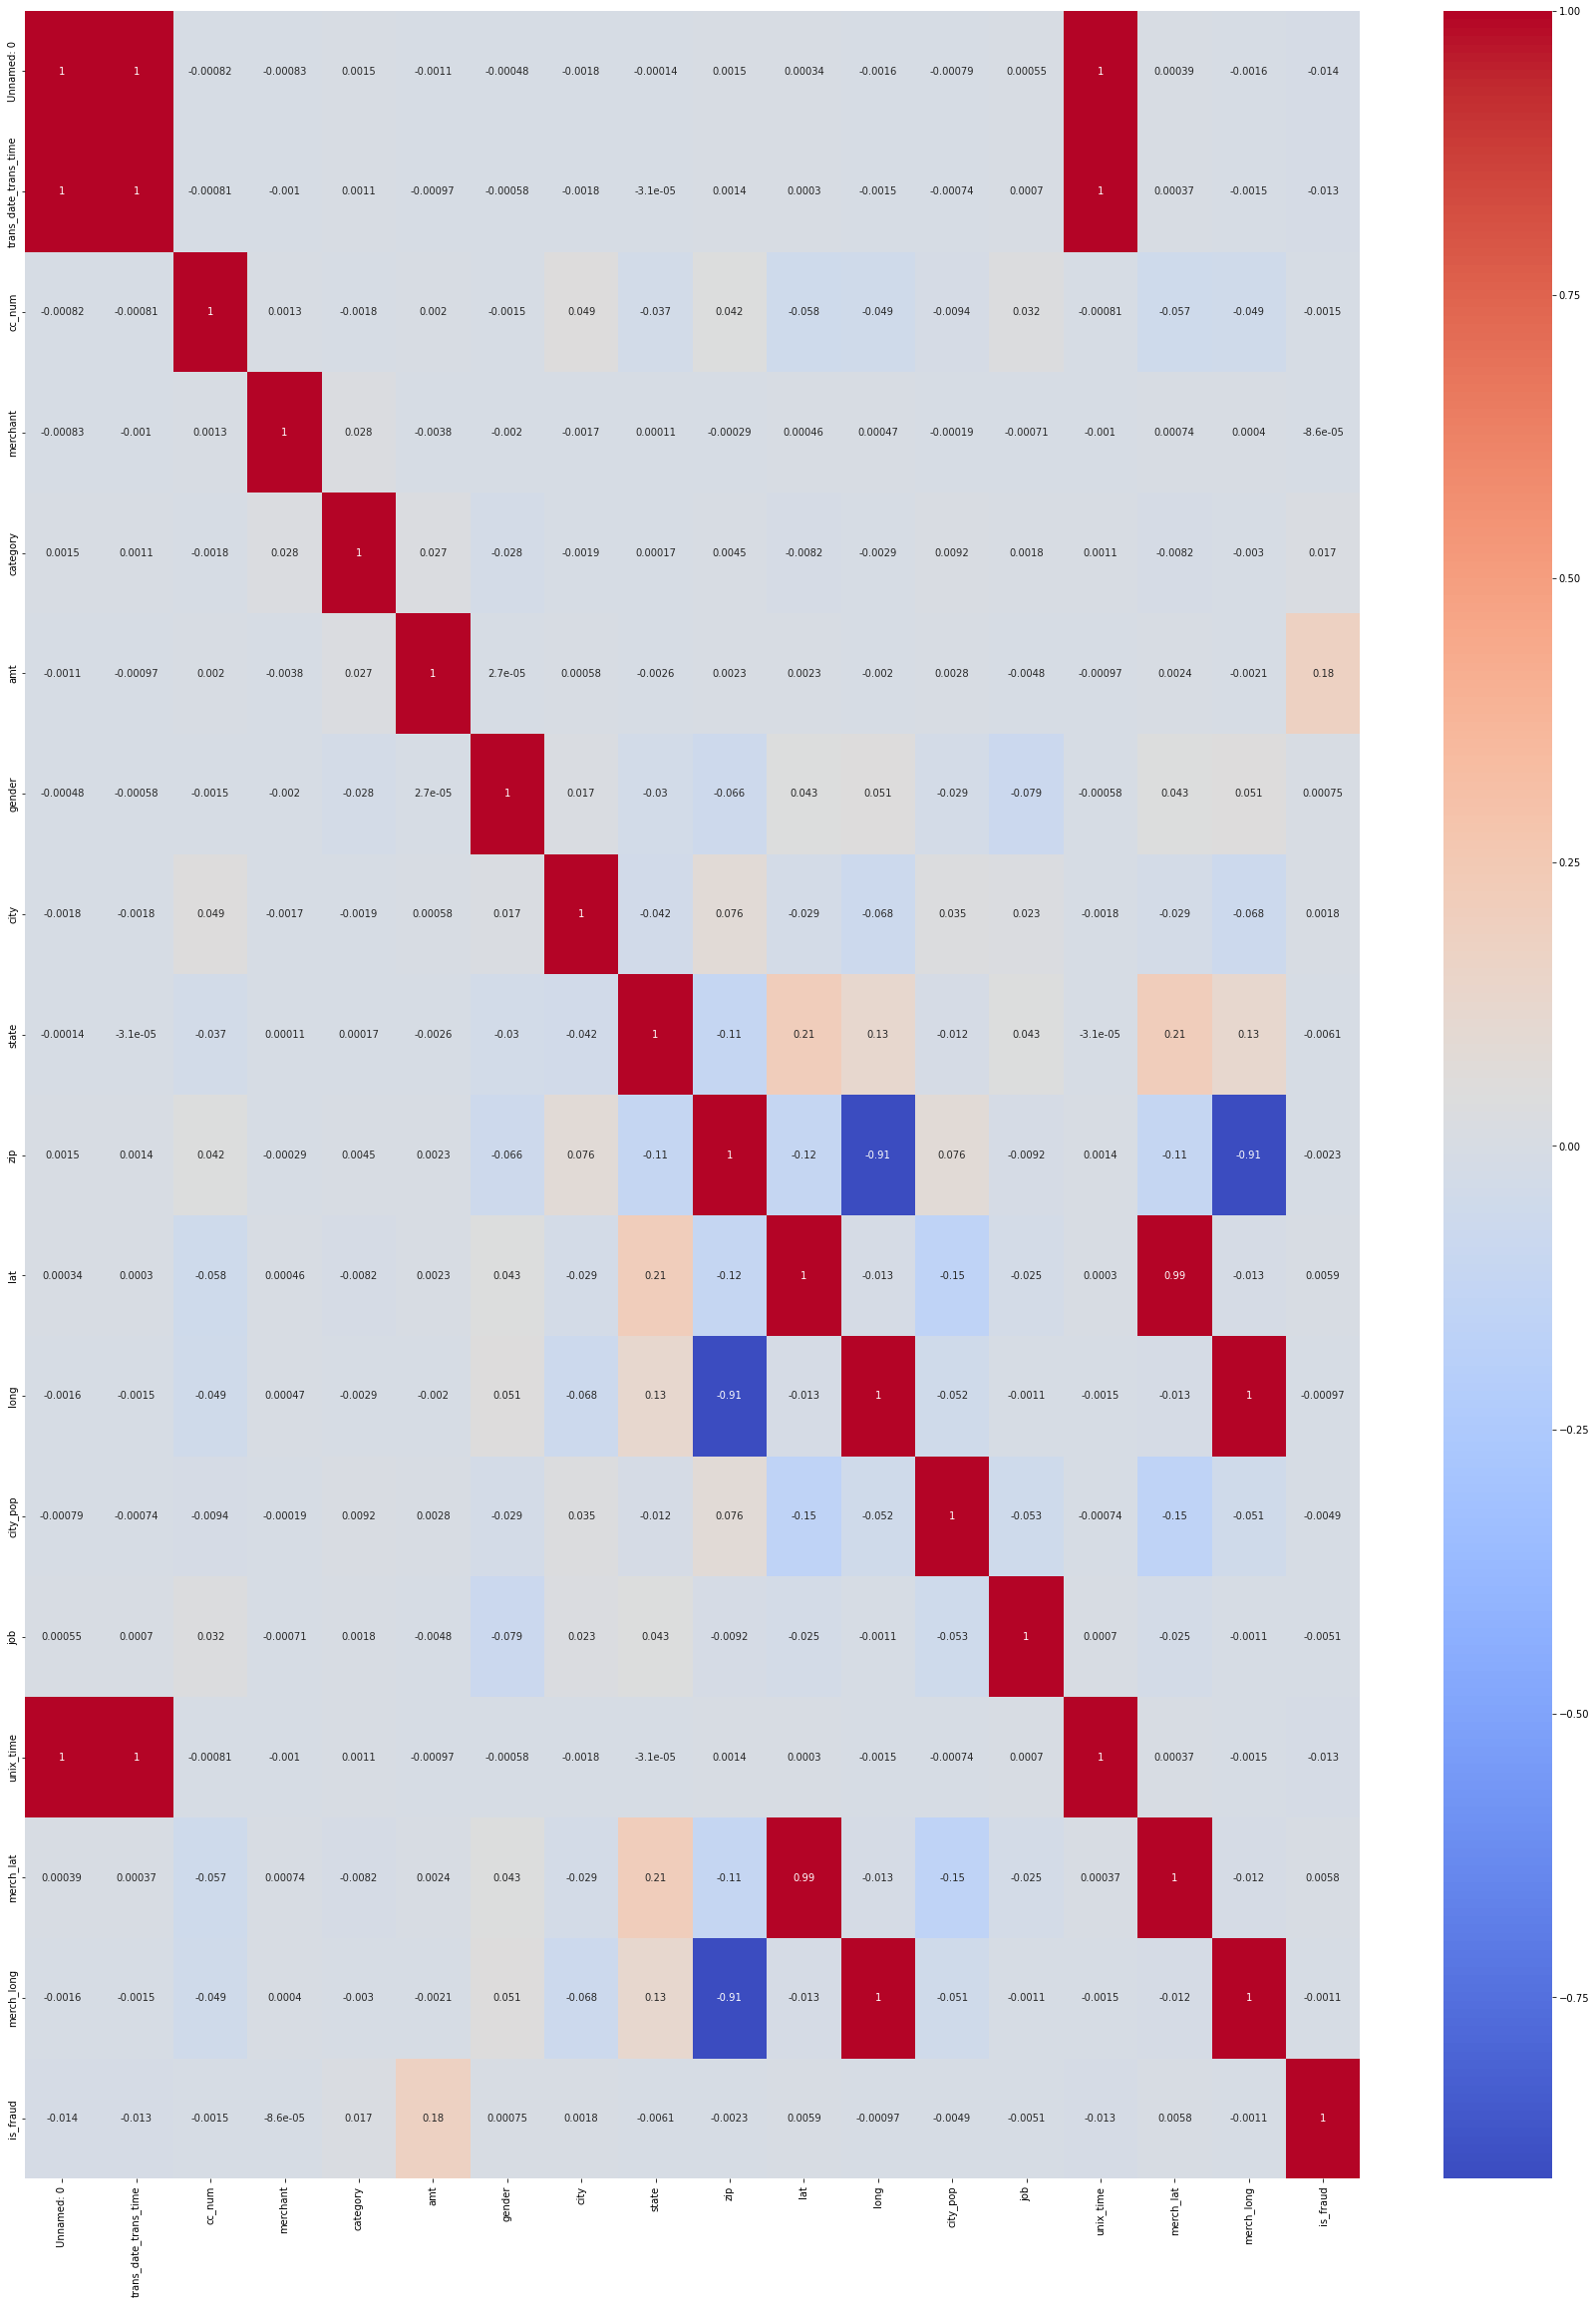

In [17]:
corr = credit_card_data.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [80]:
# X = credit_card_data.drop(columns=['is_fraud'], axis=1)
# y = credit_card_data['is_fraud']

In [87]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_scaler = sc.fit_transform(X)

In [18]:
# x_scaler[-1]

In [19]:
from sklearn.metrics import classification_report, f1_score
# x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [20]:
from sklearn.linear_model import LogisticRegression

In [92]:
# model = LogisticRegression()
# # training
# model.fit(x_train, y_train)

LogisticRegression()

In [21]:
X = credit_card_data.iloc[:,:-1]
y = credit_card_data['is_fraud']

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [23]:
x_scaler[-1]

array([ 1.73204769,  1.5103546 , -0.31581677, -1.08347186, -1.59398566,
       -0.19944911,  1.10249443, -0.80994048,  0.65372002,  0.90080575,
       -0.56837864, -0.52824645,  0.09247663,  0.25119572,  1.51035546,
       -0.45776708, -0.49551901])

In [24]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.35, random_state=42, stratify=y)

In [25]:
from sklearn import linear_model

In [65]:
# model = linear_model.LogisticRegressionCV(max_iter = 4000) 

In [26]:
clf = LogisticRegression(C=1e5)

In [27]:
clf.fit(x_train, y_train)

LogisticRegression(C=100000.0)

In [29]:
# testing
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193751
           1       0.00      0.00      0.00       751

    accuracy                           1.00    194502
   macro avg       0.50      0.50      0.50    194502
weighted avg       0.99      1.00      0.99    194502

F1 Score: 0.0
